In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from hyperparam_scan_util import GridScanExports

pd.set_option('display.max_columns', None)

## Load

In [3]:
exports = GridScanExports.load("exports/grid_scans/main_v2.1_max_over_time")
trials_df = exports.trials
epochs_df = exports.epochs
exports

GridScanExports(24 runs, 1071 trials, 54621 epochs)

In [4]:
trials_df.head()

,scan_id,run_id,started_at,finished_at,duration,error,config_hash,config.device_count,config.seed,config.tau,config.I0,config.eps,config.Nhidden,config.Nout,config.w_scale,config.K,config.dt,config.gamma,config.Nbatch,config.lr,config.tau_lr,config.beta1,config.beta2,config.p_flip,config.Nepochs,config.Ntrain,config.Nin,config.Nsamples,config.normalize_times,config.out_func,config.Nin_virtual,config.Nlayer,config.T,config.readout_V0,config.readout_w,metrics.acc_init_mean,metrics.acc_init_std,metrics.acc_final_mean,metrics.acc_final_std,metrics.acc_min_epoch,metrics.acc_min_mean,metrics.acc_min_std,metrics.acc_max_epoch,metrics.acc_max_mean,metrics.acc_max_std,metrics.acc_ord_init_mean,metrics.acc_ord_init_std,metrics.acc_ord_final_mean,metrics.acc_ord_final_std,metrics.acc_ord_min_epoch,metrics.acc_ord_min_mean,metrics.acc_ord_min_std,metrics.acc_ord_max_epoch,metrics.acc_ord_max_mean,metrics.acc_ord_max_std,metrics.activity_init_mean,metrics.activity_init_std,metrics.activity_final_mean,metrics.activity_final_std,metrics.activity_min_epoch,metrics.activity_min_mean,metrics.activity_min_std,metrics.activity_max_epoch,metrics.activity_max_mean,metrics.activity_max_std,metrics.activity_first_init_mean,metrics.activity_first_init_std,metrics.activity_first_final_mean,metrics.activity_first_final_std,metrics.activity_first_min_epoch,metrics.activity_first_min_mean,metrics.activity_first_min_std,metrics.activity_first_max_epoch,metrics.activity_first_max_mean,metrics.activity_first_max_std,metrics.epoch_time_mean,metrics.epoch_time_std,metrics.init_compile_time_mean,metrics.init_compile_time_std,metrics.init_optim_time_mean,metrics.init_optim_time_std,metrics.init_phi0_time_mean,metrics.init_phi0_time_std,metrics.init_time_mean,metrics.init_time_std,metrics.init_weights_time_mean,metrics.init_weights_time_std,metrics.loss_init_mean,metrics.loss_init_std,metrics.loss_final_mean,metrics.loss_final_std,metrics.loss_min_epoch,metrics.loss_min_mean,metrics.loss_min_std,metrics.loss_max_epoch,metrics.loss_max_mean,metrics.loss_max_std,metrics.loss_ord_init_mean,metrics.loss_ord_init_std,metrics.loss_ord_final_mean,metrics.loss_ord_final_std,metrics.loss_ord_min_epoch,metrics.loss_ord_min_mean,metrics.loss_ord_min_std,metrics.loss_ord_max_epoch,metrics.loss_ord_max_mean,metrics.loss_ord_max_std,metrics.silent_neurons_init_mean,metrics.silent_neurons_init_std,metrics.silent_neurons_final_mean,metrics.silent_neurons_final_std,metrics.silent_neurons_min_epoch,metrics.silent_neurons_min_mean,metrics.silent_neurons_min_std,metrics.silent_neurons_max_epoch,metrics.silent_neurons_max_mean,metrics.silent_neurons_max_std,metrics.silent_neurons_first_init_mean,metrics.silent_neurons_first_init_std,metrics.silent_neurons_first_final_mean,metrics.silent_neurons_first_final_std,metrics.silent_neurons_first_min_epoch,metrics.silent_neurons_first_min_mean,metrics.silent_neurons_first_min_std,metrics.silent_neurons_first_max_epoch,metrics.silent_neurons_first_max_mean,metrics.silent_neurons_first_max_std,metrics.train_time_mean,metrics.train_time_std
1051,main_v2.1_max_over_time,17104261_01,2024-10-02_18-14-02_015438,2024-10-02_18-16-07_058882,125.043444,None,7e1c5a940ace3d708ae2a42af1577597,1,0,1,1.25,0.000001,100,20,0.5,700,0.001,0.01,1000,0.004,100.0,0.9,0.999,0.0,50,None,700,3,True,max_over_time_potential,1,2,1,0.00,0.1,0.045795,0.001579,0.044865,0.001159,19,0.042387,0.000876,5,0.049202,0.003477,0.045795,0.001579,0.044865,0.001159,19,0.042387,0.000876,5,0.049202,0.003477,0.327372,0.048749,0.300810,0.027017,44,0.300734,0.026919,0,0.327372,0.048749,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.729556,0.079886,0.000605,0.000019,0.014885,0.017766,0.023743,0.032711,3.732986,3.490700,0.176420,0.247637,2.995732,0.000000,2.995732,0.000000,0,2.995732,0.000000,0,2.995732,0.000000,2.995732,0.000000,2.995732,0.000000,0,2.995732,0.000000,0,2.995732,0.000000,0.166667,0.033993,0.426667,0.009428,0,0.166667,0.033993,43,0.436667,0.023570,1.0,0.0,1.0,0.0,0,1.0,0.0,0,1.0,0.0,36

## Error Summary

In [5]:
n_error = trials_df["error"].notna().sum()
print(f"{n_error} / {len(trials_df)} trials contain errors")
print()

for i, error in enumerate(trials_df["error"].dropna().sort_values().unique()):
    short_error = str(error).split("---", 1)[0].strip().split("\n")[-1]
    print(short_error)
    trials = trials_df[trials_df["error"] == error]
    print(f"Appears in {len(trials)} trials: {trials['config_hash'].tolist()}")
    print()

0 / 1071 trials contain errors



In [6]:
def key_format(key: str):
    return key.removeprefix("config.").removeprefix("metrics.")


indep_keys = tuple(
    key for key in trials_df.columns
    if key.startswith("config.") and key != "config.Nin"
)
print("independent keys:", indep_keys)

independent keys: ('config.device_count', 'config.seed', 'config.tau', 'config.I0', 'config.eps', 'config.Nhidden', 'config.Nout', 'config.w_scale', 'config.K', 'config.dt', 'config.gamma', 'config.Nbatch', 'config.lr', 'config.tau_lr', 'config.beta1', 'config.beta2', 'config.p_flip', 'config.Nepochs', 'config.Ntrain', 'config.Nsamples', 'config.normalize_times', 'config.out_func', 'config.Nin_virtual', 'config.Nlayer', 'config.T', 'config.readout_V0', 'config.readout_w')


In [7]:
from spikegd.utils.data import Data

trials_data = Data(trials_df, indep_keys)
print(trials_data.schema())

Data:
  const config.device_count = 1
  const config.seed = 0
  const config.tau = 1
  const config.I0 = 1.25
  const config.eps = 1e-06
  const config.Nhidden = 100
  const config.Nout = 20
  const config.w_scale = 0.5
  const config.K = 700
  const config.dt = 0.001
  const config.gamma = 0.01
  const config.Nbatch = 1000
  const config.lr = 0.004
  const config.tau_lr = 100.0
  const config.beta1 = 0.9
  const config.beta2 = 0.999
  const config.p_flip = 0.0
  const config.Nepochs = 50
  const config.Ntrain = None
  const config.Nsamples = 3
  const config.normalize_times = True
  const config.out_func = 'max_over_time_potential'
  var config.Nin_virtual = 1 (222x), 16 (220x), 8 (218x), 4 (217x), 32 (194x)
  var config.Nlayer = 2 (384x), 3 (353x), 4 (334x)
  var config.T = 4 (271x), 2 (269x), 8 (269x), 1 (262x)
  var config.readout_V0 = 0.0 (180x), 1.25 (180x), 3.0 (180x), 10.0 (180x), 20.0 (130x), 100.0 (111x), 50.0 (110x)
  var config.readout_w = 0.1 (240x), 1.0 (240x), 10.0 (240x

## Dependencies on `Nin_virtual`

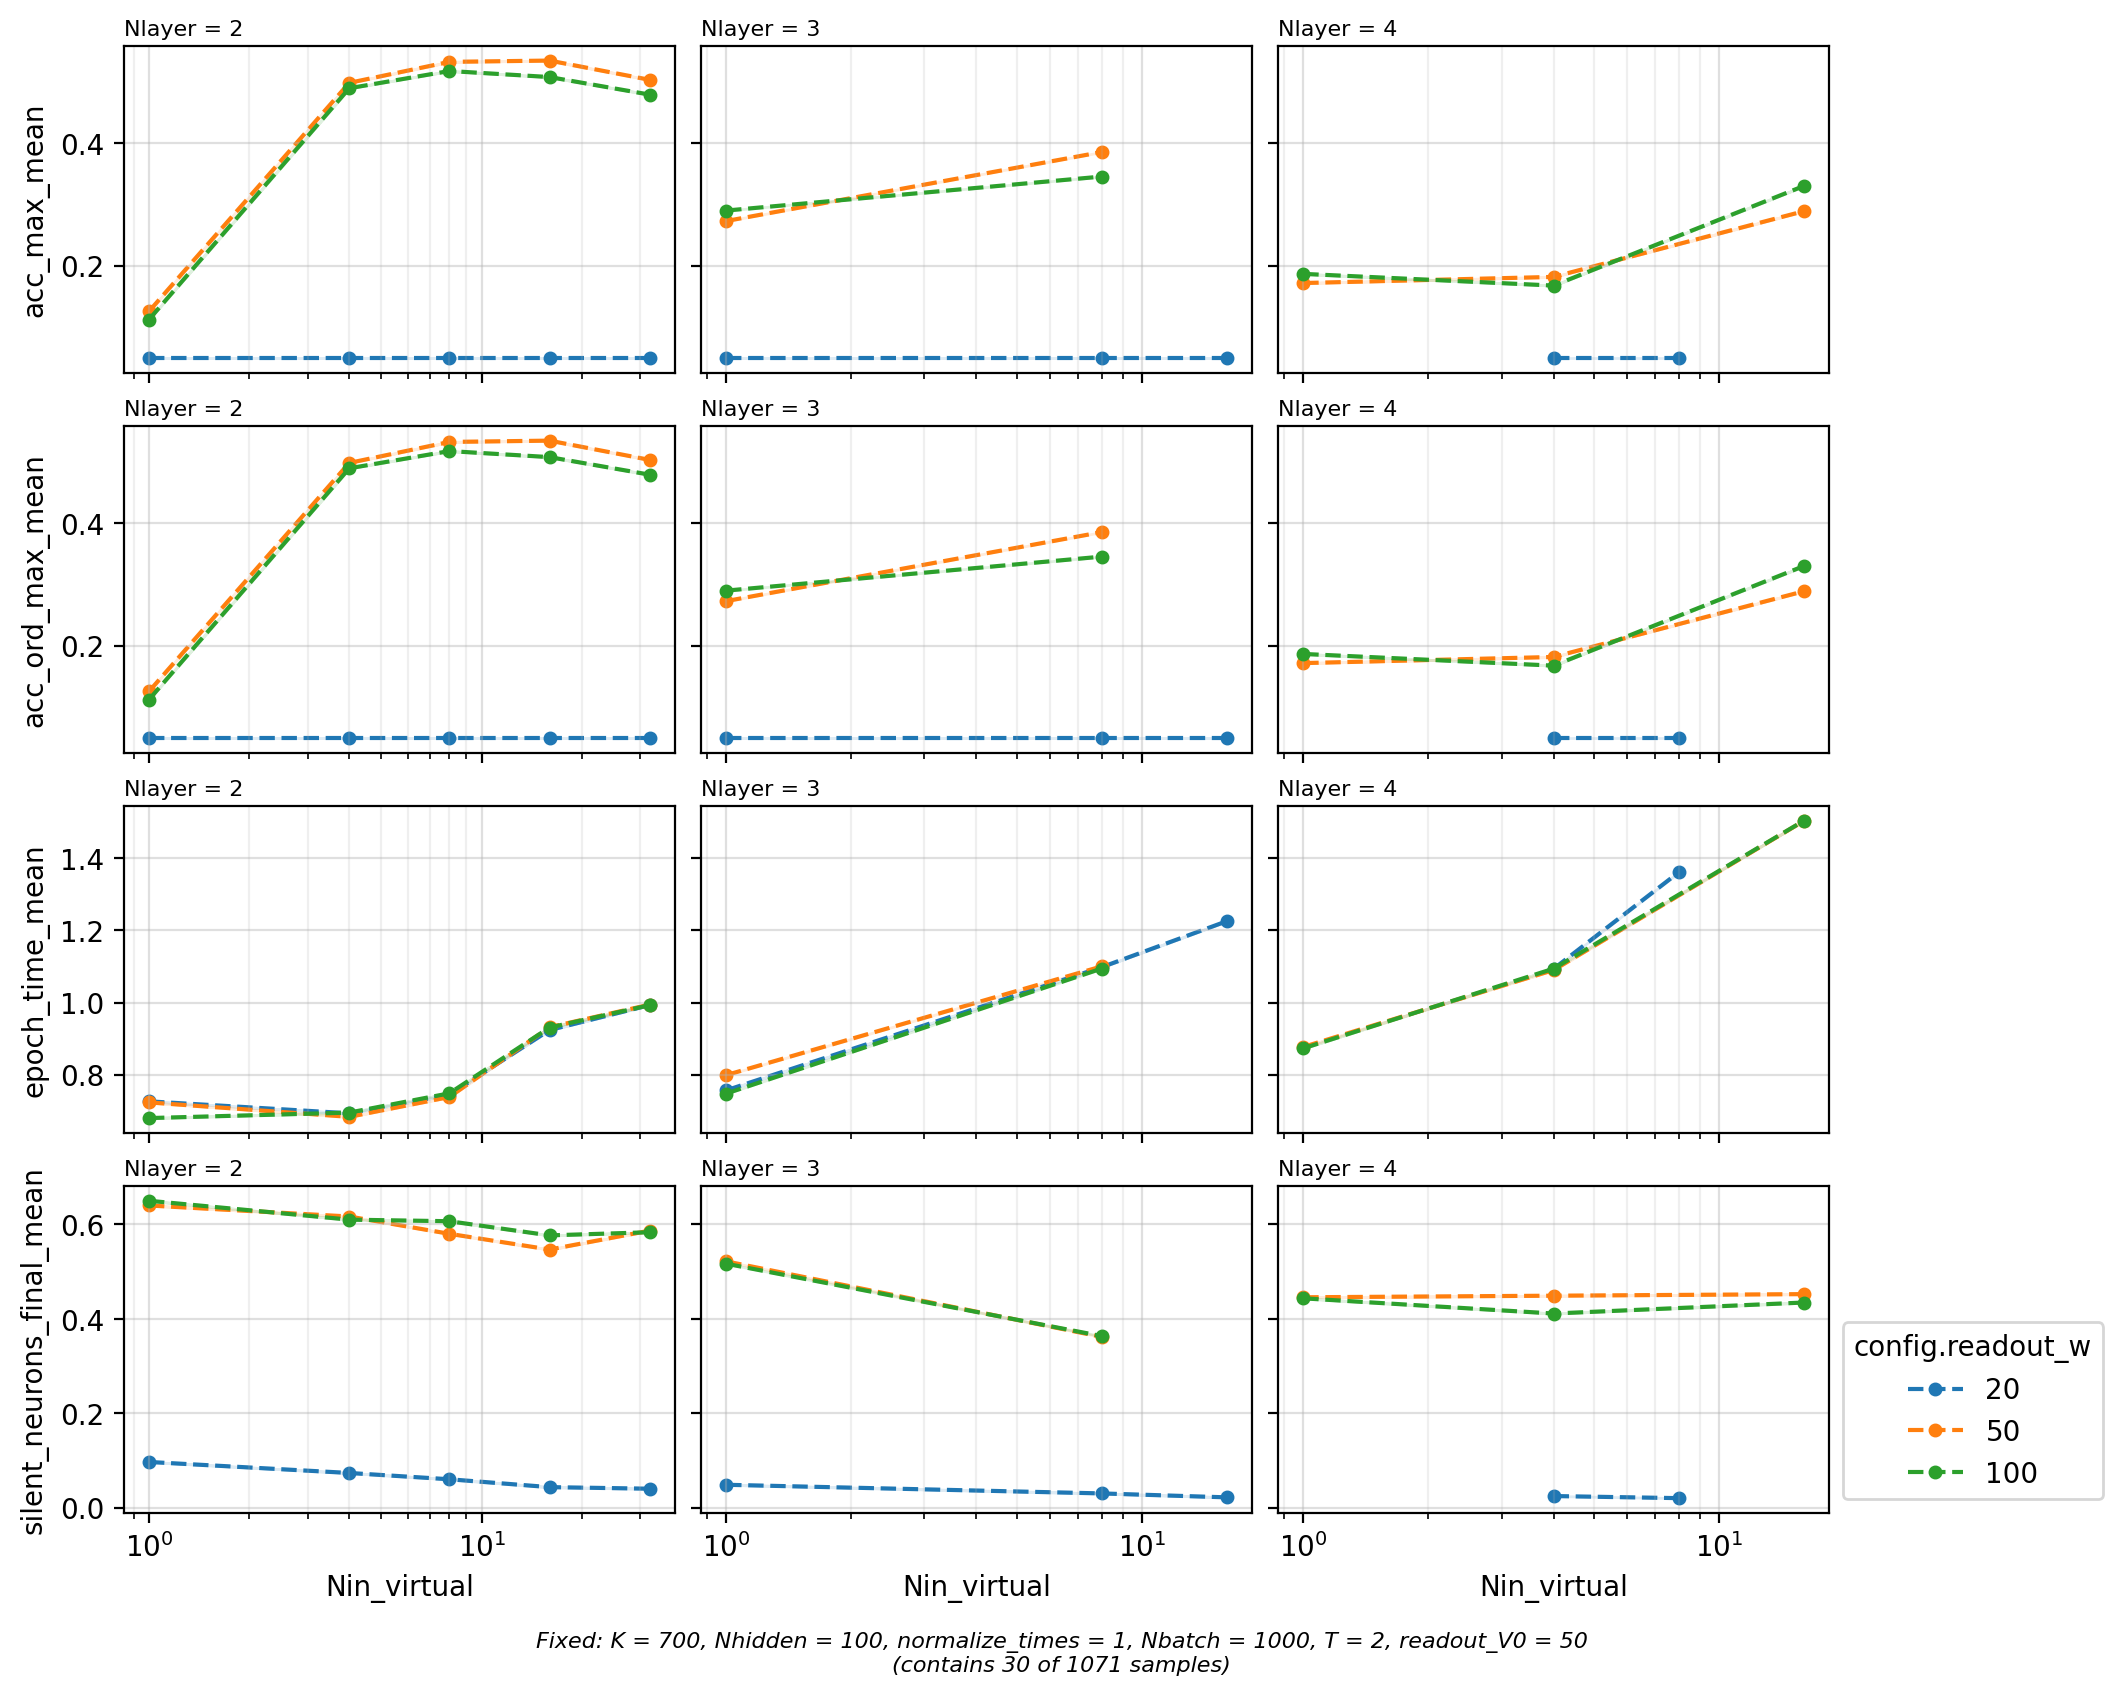

In [8]:
from spikegd.utils.plotting import LinePlot, PlotGrid

PlotGrid(
    arg_keys="config.Nin_virtual",
    func_keys=(
        "metrics.acc_max_mean",
        "metrics.acc_ord_max_mean",
        "metrics.epoch_time_mean",
        # "metrics.acc_max_epoch",
        "metrics.silent_neurons_final_mean",
    ),
    plots=[LinePlot(
        graph_key="config.readout_w",
        x_scale="log",
        corridor="std"
    )],
    col_keys="config.Nlayer",
    fixed_values={
        "config.K": 700,
        "config.Nhidden": 100,
        "config.normalize_times": True,
        "config.Nbatch": 1000,
        "config.T": 2,
        "config.readout_V0": 50,
        # "config.tau": 1,
    },
    # whitelists={"config.tau": [0.5, 1, 2, 3, 5]},
    indep_keys=indep_keys,
    key_format=key_format,
).show(trials_data.df)

## Dependencies on time constants

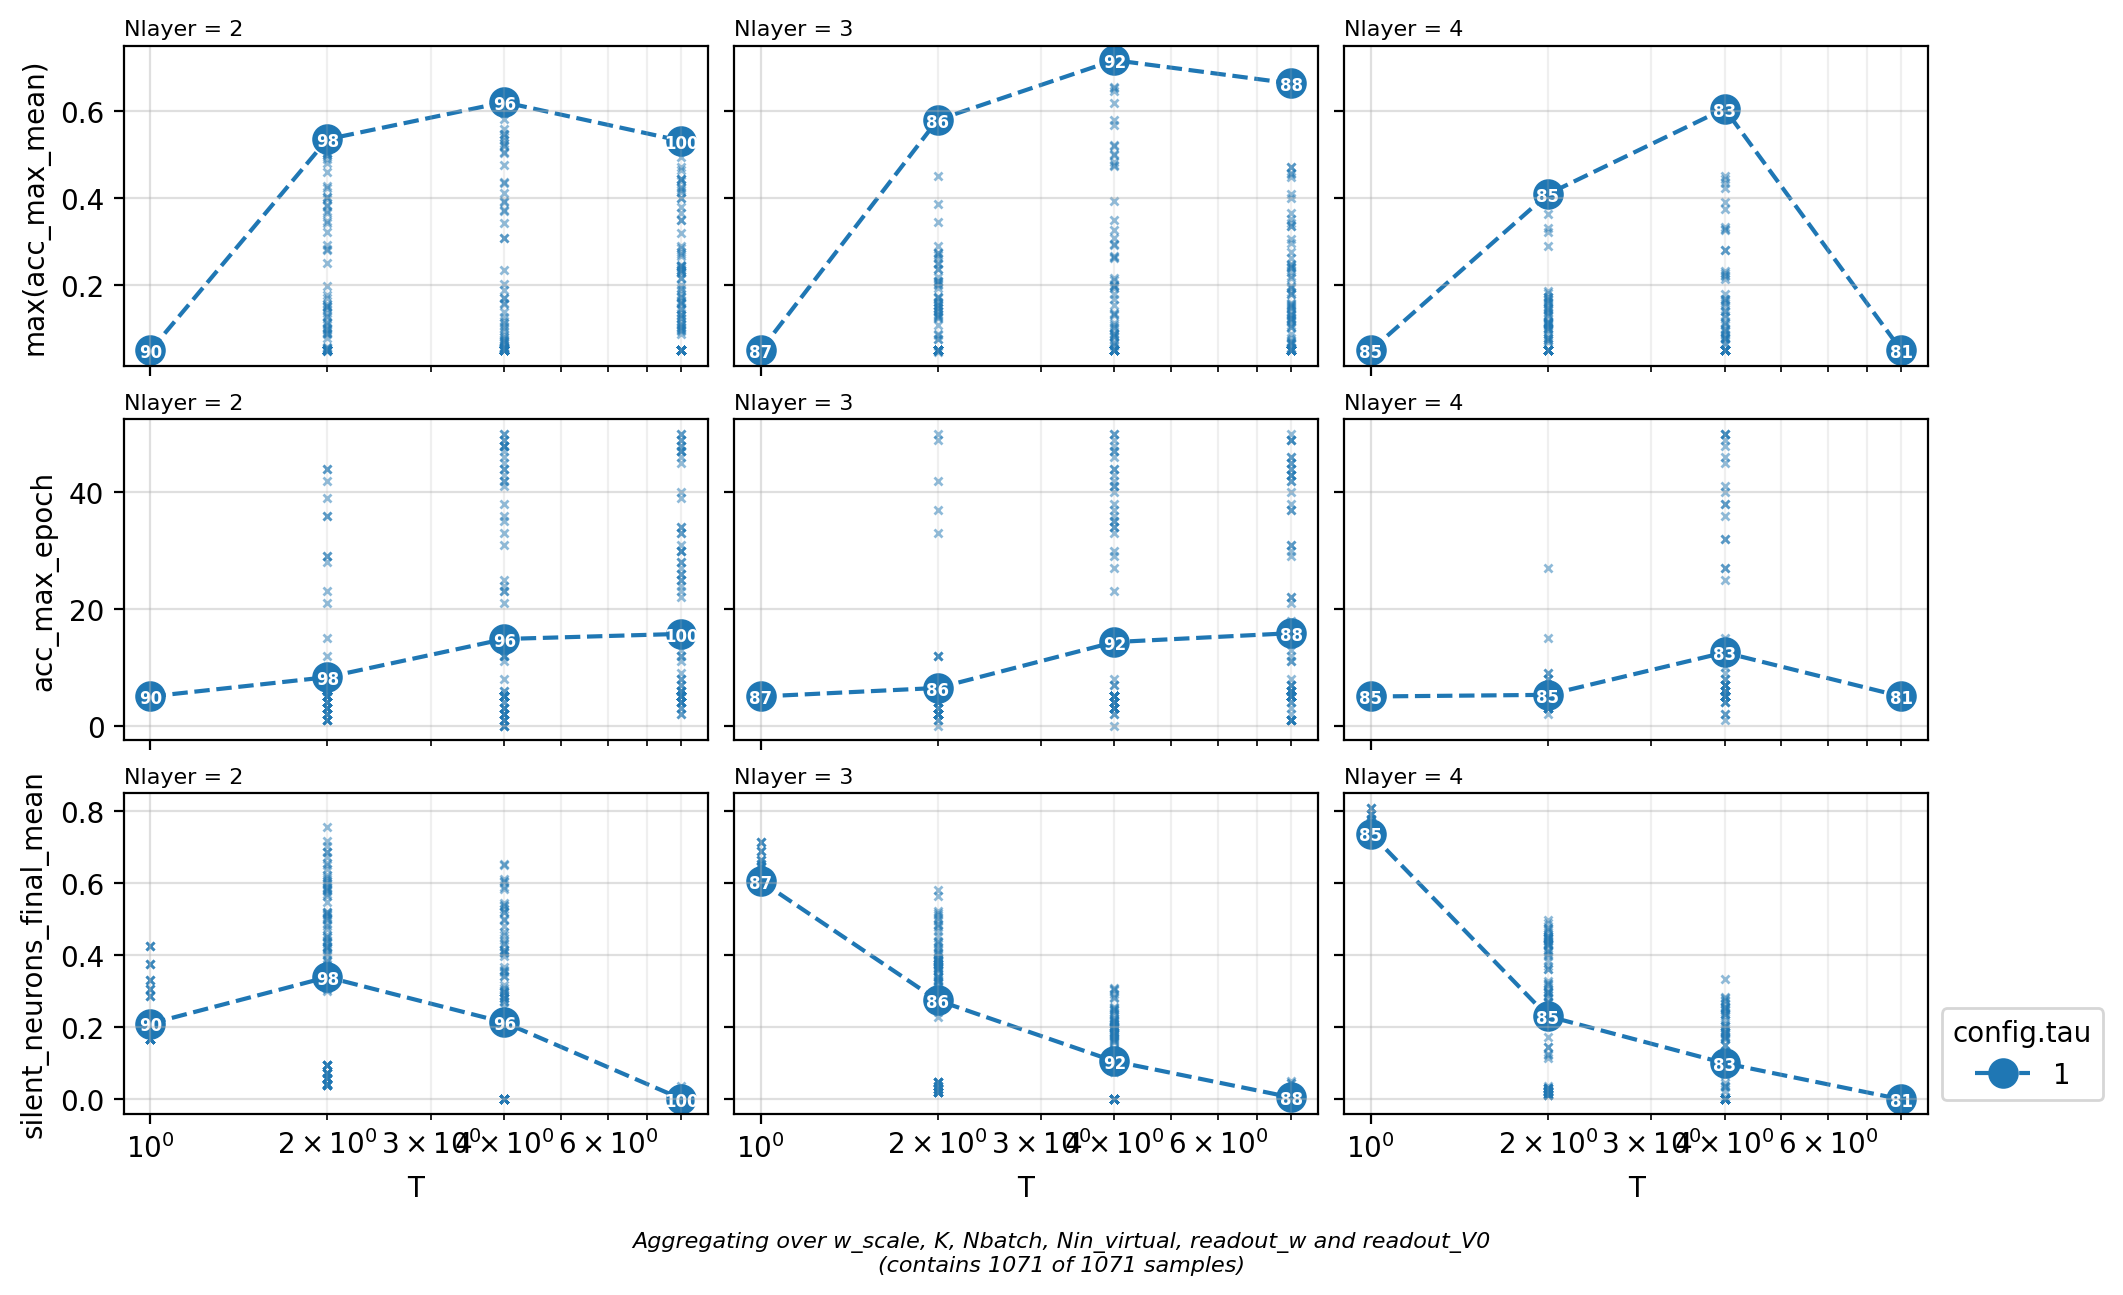

In [18]:
PlotGrid(
    arg_keys=("config.T",),
    func_keys=(
        "metrics.acc_max_mean",
        # "metrics.acc_ord_max_mean",
        # "metrics.acc_final_mean",
        # "metrics.epoch_time_mean",
        "metrics.acc_max_epoch",
        "metrics.silent_neurons_final_mean",
    ),
    func_aggs={"*": "mean", "metrics.acc_max_mean": "max"},
    plots=[LinePlot(
        graph_key="config.tau",
        x_scale="log",
    )],
    col_keys="config.Nlayer",
    agg_keys=(
        "config.w_scale",
        "config.K",
        "config.Nbatch",
        "config.Nin_virtual",
        "config.readout_w",
        "config.readout_V0",
    ),
    indep_keys=indep_keys,
    key_format=key_format,
).show(trials_df)

In [14]:
# from matplotlib.axes import Axes
# from pandas.core.api import DataFrame as DataFrame
# from spikegd.utils.plotting import HeatmapPlot, Plot, PlotGrid, _get_val_list


# class NanXPlot(Plot):
#     def __init__(self, key: str):
#         self.key = key
    
#     def draw_to_ax(
#         self,
#         grid: PlotGrid,
#         full_df: DataFrame,
#         ax: Axes,
#         ax_df: DataFrame,
#         func_key: str,
#         func_agg: str | None,
#     ) -> None:
#         if len(grid.arg_keys) != 2:
#             raise ValueError(
#                 "HeatmapPlot requires exactly two arg keys since it is 2-dimensional"
#             )

#         x_key, y_key = grid.arg_keys
        
#         x_vals = _get_val_list(full_df, x_key, grid.min_points_per_ax)
#         y_vals = _get_val_list(full_df, y_key, grid.min_points_per_ax)

#         if not x_vals or not x_vals:
#             return

#         x_vals = np.sort(x_vals)
#         y_vals = np.sort(y_vals)
#         shape = (len(x_vals), len(y_vals))

#         for x_i, y_i in np.ndindex(shape):
#             mask = (ax_df[x_key] == x_vals[x_i]) & (ax_df[y_key] == y_vals[y_i])

#             if not mask.any():
#                 continue

#             losses = ax_df[mask][self.key]

#             if losses.isna().all():
#                 ax.plot(x_i, y_i, "x", ms=3, color="white", alpha=0.5)
#             elif losses.isna().any():
#                 ax.plot(x_i, y_i, ".", ms=3, color="white", alpha=0.5)


# PlotGrid(
#     arg_keys=("config.T", "config.tau"),
#     func_keys=(
#         "metrics.acc_max_mean",
#         "metrics.acc_ord_max_mean",
#         # "metrics.epoch_time_mean",
#         # "metrics.silent_neurons_final_mean",
#     ),
#     func_aggs={"*": "mean"},
#     plots=[
#         HeatmapPlot(),
#         NanXPlot("metrics.loss_final_mean")
#     ],
#     fixed_values={
#         "config.normalize_times": True,
#         "config.w_scale": 0.5,
#         "config.K": 700,
#         "config.Nbatch": 1000,
#         "config.Nhidden": 128,
#     },
#     fig_key="config.Nlayer",
#     col_keys="config.gamma",
#     indep_keys=indep_keys,
#     key_format=key_format,
# ).show(trials_df)

In [12]:
def get_variables(df, indep_keys):
    variables = {}
    for key in indep_keys:
        if len(vals := df[key].unique()) > 1:
            variables[key] = vals
    return variables

def expect_variables(df, indep_keys, expected_variables):
    variables = set(get_variables(df, indep_keys).keys())
    expect_variables = set(expected_variables)
    
    if variables != expect_variables:
        raise ValueError(f"Expected variables {expect_variables}, got {variables}")

def where_equals(df, values: dict):
    for key, value in values.items():
        df = df[df[key] == value]

    return df

In [15]:
# df = where_equals(trials_df, {
#     "config.normalize_times": True,
#     "config.w_scale": 0.5,
#     "config.Nlayer": 3,
#     "config.K": 700,
#     "config.Nhidden": 128,
#     "config.gamma": 0.1,
# })
# expect_variables(df, indep_keys, {"config.T", "config.tau"})
# # print_dict(get_variables(df, indep_keys), value_format=fmt_list)

# fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(7, 6), sharex=True)

# def plot_tau_vs_T(ax, df, label):
#     T = df["config.T"]
#     tau = df["config.tau"]
#     log_T = np.log(T)
#     log_tau = np.log(tau)

#     line, = ax.plot(T, tau, 'o', label=label)

#     m, b = np.polyfit(log_T, log_tau, 1)

#     tau_fit = np.exp(m * log_T + b)

#     ax.plot(T, tau_fit, color=line.get_color(),
#             label=f"Fit: $\\tau = {np.exp(b):.3f} \\cdot T^{{{m:.3f}}}$")


# best_per_T = df.loc[df.groupby("config.T")["metrics.acc_max_mean"].idxmax()]
# plot_tau_vs_T(ax1, best_per_T, "with pseudospikes")
# ax2.plot(best_per_T["config.T"], best_per_T["metrics.acc_max_mean"], 'o--')

# best_ord_per_T = df.loc[df.groupby("config.T")["metrics.acc_ord_max_mean"].idxmax()]
# plot_tau_vs_T(ax1, best_ord_per_T, "without pseudospikes")
# ax2.plot(best_ord_per_T["config.T"], best_ord_per_T["metrics.acc_ord_max_mean"], 'o--')

# ax1.set_ylabel("$\\tau$ for best accuracy")
# ax1.set_yscale("log")
# ax1.legend()

# ax2.set_ylabel("Best accuracy")


# ax2.set_xlabel("$T$")
# ax2.set_xscale("log")

# for ax in (ax1, ax2):
#     ax.grid(which="major", alpha=0.5)
#     ax.grid(which="minor", alpha=0.2)

# plt.tight_layout()
# plt.show()

## Best trials

===== BEST TRIAL 0 =====
CONFIG
- device_count            1
- seed                    0
- tau                     1
- I0                      1.25
- eps                     1e-06
- Nhidden                 100
- Nout                    20
- w_scale                 0.5
- K                       700
- dt                      0.001
- gamma                   0.01
- Nbatch                  1000
- lr                      0.004
- tau_lr                  100
- beta1                   0.9
- beta2                   0.999
- p_flip                  0
- Nepochs                 50
- Ntrain                  None
- Nin                     700
- Nsamples                3
- normalize_times         1
- out_func                max_over_time_potential
- Nin_virtual             16
- Nlayer                  3
- T                       4
- readout_V0              100
- readout_w               100
METRICS
- acc_init                      0.0505 ± 0.0057
- acc_final                     0.6671 ± 0.0117
- acc_min  

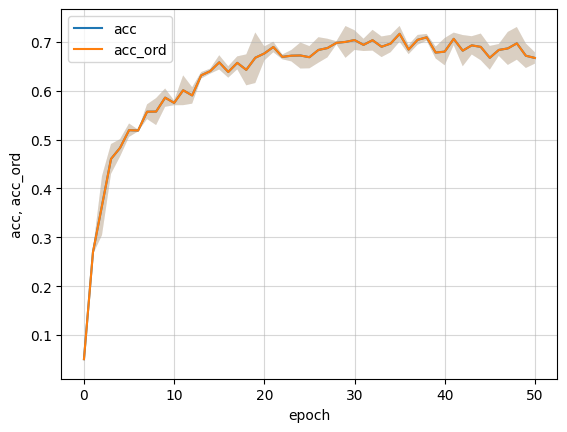

===== BEST TRIAL 1 =====
CONFIG
- device_count            1
- seed                    0
- tau                     1
- I0                      1.25
- eps                     1e-06
- Nhidden                 100
- Nout                    20
- w_scale                 0.5
- K                       700
- dt                      0.001
- gamma                   0.01
- Nbatch                  1000
- lr                      0.004
- tau_lr                  100
- beta1                   0.9
- beta2                   0.999
- p_flip                  0
- Nepochs                 50
- Ntrain                  None
- Nin                     700
- Nsamples                3
- normalize_times         1
- out_func                max_over_time_potential
- Nin_virtual             16
- Nlayer                  3
- T                       4
- readout_V0              50
- readout_w               50
METRICS
- acc_init                      0.0505 ± 0.0057
- acc_final                     0.6991 ± 0.0162
- acc_min    

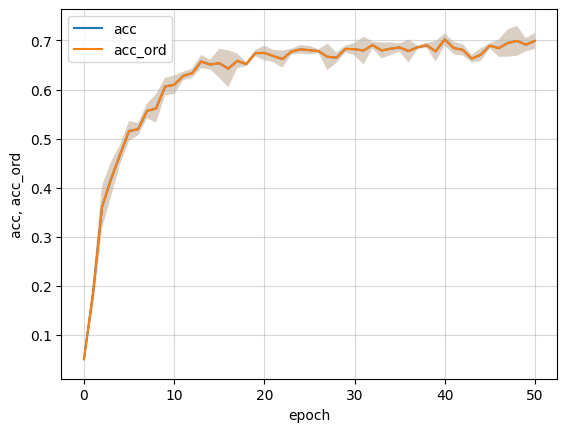

===== BEST TRIAL 2 =====
CONFIG
- device_count            1
- seed                    0
- tau                     1
- I0                      1.25
- eps                     1e-06
- Nhidden                 100
- Nout                    20
- w_scale                 0.5
- K                       700
- dt                      0.001
- gamma                   0.01
- Nbatch                  1000
- lr                      0.004
- tau_lr                  100
- beta1                   0.9
- beta2                   0.999
- p_flip                  0
- Nepochs                 50
- Ntrain                  None
- Nin                     700
- Nsamples                3
- normalize_times         1
- out_func                max_over_time_potential
- Nin_virtual             16
- Nlayer                  3
- T                       8
- readout_V0              20
- readout_w               100
METRICS
- acc_init                      0.0457 ± 0.0031
- acc_final                     0.5563 ± 0.1108
- acc_min   

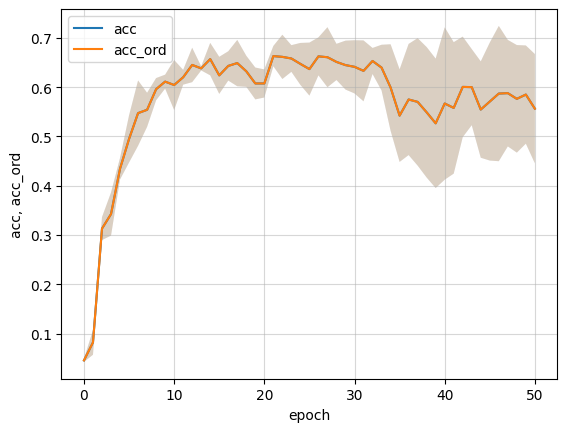

In [16]:
from spikegd.utils.formatting import print_dict

def plot_training_curves(config_hash, metrics=["acc", "acc_ord"]):
    trial_epochs = epochs_df[epochs_df["config_hash"] == config_hash]
    
    epochs = np.arange(len(trial_epochs))
    
    fig, ax = plt.subplots()

    for metric in metrics:
        mean_arr = trial_epochs[f"{metric}_mean"]
        std_arr = trial_epochs[f"{metric}_std"]

        na_count = np.isnan(mean_arr).sum()
        if na_count > 0:
            print(f"Warning: {na_count} NaN values in {metric}_mean")

        ax.plot(epochs, mean_arr, label=metric)
        ax.fill_between(epochs, mean_arr - std_arr, mean_arr + std_arr, alpha=0.2)

    ax.set_xlabel("epoch")
    ax.set_ylabel(", ".join(metrics))
    ax.grid(alpha=0.5)
    ax.legend()

    plt.show()

def summarize_trial(trial_row):
    print("CONFIG")
    print_dict(
        {
            "- " + key.removeprefix("config."): value
            for key, value in trial_row.items()
            if key.startswith("config.")
        }
    )
    print("METRICS")

    def summarize_metric(mean_key):
        std_key = mean_key.replace("_mean", "_std")
        epoch_key = mean_key.replace("_mean", "_epoch")

        s = f"{trial_row[mean_key]:.4f}"

        if std_key in trial_row:
            s += f" ± {trial_row[std_key]:.4f}"

        if epoch_key in trial_row:
            s += f" at epoch {trial_row[epoch_key]:.0f}"

        return s

    print_dict(
        {
            "- " + key.removeprefix("metrics.").removesuffix("_mean"): summarize_metric(key)
            for key, value in trial_row.items()
            if key.startswith("metrics.") and key.endswith("_mean")
        },
        indent=32,
    )

best_trials = trials_df \
    .sort_values("metrics.acc_ord_max_mean", ascending=False, ignore_index=True) \
    .head(3)

for i, best_trial in best_trials.iterrows():
    print(f"===== BEST TRIAL {i} =====")
    # print(f"Max accuracy: {best_trial['metrics.acc_max_mean']:.4f} ± {best_trial['metrics.acc_max_std']:.4f} at epoch {best_trial['metrics.acc_max_epoch']}")
    summarize_trial(best_trial)
    plot_training_curves(best_trial["config_hash"])